In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
N = 100
D = 2

X = np.random.randn(N,D)
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

w = np.random.randn(D + 1)

z = Xb.dot(w)

#Write Sigmoid Fucntion
def sigmoid(z):
    return 1/(1 + np.exp(-z))

print(sigmoid(z))

[0.6761889  0.97153867 0.61624818 0.88694155 0.13380851 0.71807766
 0.9294058  0.73045455 0.47410697 0.98412593 0.92318526 0.64777478
 0.57817288 0.77298293 0.932679   0.6693966  0.75994398 0.29551298
 0.32565246 0.96379094 0.84699092 0.57317049 0.68013454 0.28855992
 0.94959115 0.12680419 0.08321928 0.65724634 0.43750538 0.46923409
 0.69919197 0.89774853 0.62266053 0.73770753 0.97025192 0.69500084
 0.85959449 0.88812862 0.96868313 0.88669399 0.78231775 0.68478372
 0.99230721 0.52706158 0.91228791 0.1999446  0.20181846 0.68998669
 0.48009106 0.16694174 0.8540122  0.41648317 0.81124857 0.76828234
 0.84358967 0.6795893  0.70568894 0.841979   0.79477012 0.7708589
 0.5805456  0.69716225 0.39616772 0.74410543 0.78285451 0.47011752
 0.87823205 0.5287871  0.51030863 0.77537608 0.76078751 0.26663798
 0.16251764 0.24174474 0.59908776 0.51899551 0.30779158 0.95859579
 0.82283196 0.94887228 0.39660671 0.65217444 0.92935231 0.96860117
 0.12489209 0.9349283  0.93733181 0.78926373 0.85620508 0.48923

In [4]:
N = 100
D = 2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

print(cross_entropy(T, Y))

# try it with our closed-form solution
w = np.array([0, 4, 4])

# calculate the model output
z = Xb.dot(w)
Y = sigmoid(z)

# calculate the cross-entropy error
print(cross_entropy(T, Y))


74.21907254635094
0.018055853041632444


95.16310356709654
0.11815209808411344
0.10659782372746615
0.09708756043331328
0.08914205913047019
0.08241834905792379
0.07666518590252064
0.07169470050009531
0.06736383771184243
0.06356189263892564
Final w: [-1.79664599 11.00051888 10.41383394]


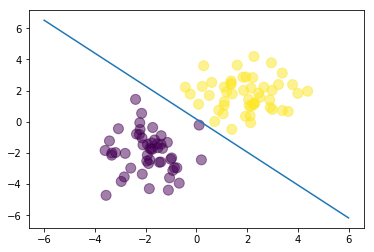

In [6]:
N = 100
D = 2

N_per_class = N//2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:N_per_class,:] = X[:N_per_class,:] - 2*np.ones((N_per_class,D))

# center the last 50 points at (2, 2)
X[N_per_class:,:] = X[N_per_class:,:] + 2*np.ones((N_per_class,D))

# labels: first N_per_class are 0, last N_per_class are 1
T = np.array([0]*N_per_class + [1]*N_per_class)

# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

Y = sigmoid(z)

# let's do gradient descent 100 times
learning_rate = 0.1
for i in range(100):
    if i % 10 == 0:
        print(cross_entropy(T, Y))

    # gradient descent weight udpate
    w += learning_rate * Xb.T.dot(T - Y)

    # recalculate Y
    Y = sigmoid(Xb.dot(w))


print("Final w:", w)

# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()



In [7]:
N = 100
D = 2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# add a column of ones
# ones = np.array([[1]*N]).T
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)


Y = sigmoid(z)

# let's do gradient descent 100 times
learning_rate = 0.1
for i in range(100):
    if i % 10 == 0:
        print(cross_entropy(T, Y))

    # gradient descent weight udpate with regularization
    w += learning_rate * ( Xb.T.dot(T - Y) - 0.1*w )

    # recalculate Y
    Y = sigmoid(Xb.dot(w))


print("Final w:", w)


63.49330346431216
0.012047229097564099
0.018579561628038945
0.027419710291137663
0.03905495954479177
0.05428628789655531
0.07443362393047649
0.10113625903960083
0.13524638378869264
0.1750395855150743
Final w: [0.29446082 2.35832727 3.18400231]


### L1 Regularization (Lasso)

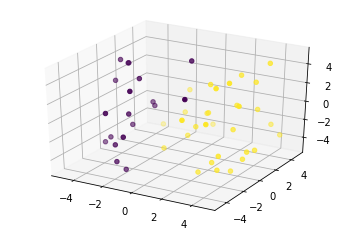

In [10]:
N = 50
D = 50

# uniformly distributed numbers between -5, +5
X = (np.random.random((N, D)) - 0.5)*10
# X = (np.random.randn(N, D) - 0.5)*10

# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))

# generate Y - add noise with variance 0.5
Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N)*0.5))

# let's plot the data to see what it looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
plt.show()

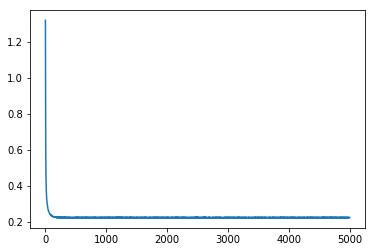

final w: [ 9.96291140e-01  5.13592112e-01 -3.04915905e-01  5.00807442e-02
  3.92893062e-02  1.22602172e-03 -2.17121141e-02  4.17630356e-03
 -2.27592110e-03 -4.12317326e-04 -4.36264876e-03 -1.84422847e-03
 -2.92097435e-03 -2.34355354e-03  4.21422550e-03  2.68957614e-03
 -2.94022238e-03 -7.86438420e-04  1.37365271e-03  2.05689170e-04
 -3.09388768e-03 -3.83635612e-04 -6.35187570e-04  1.21858643e-03
 -4.35489307e-03  4.00787661e-02 -3.73551997e-03  2.12646629e-03
  4.86289559e-03  1.66106046e-03 -2.37111710e-03  7.90072901e-02
 -4.54374542e-03  3.52994899e-03  4.04470574e-03 -6.07014852e-02
  8.74511740e-02 -3.02864123e-03 -1.62512195e-03  3.34880653e-03
  2.99811233e-04  2.58690075e-03 -9.67862335e-04 -5.35002341e-04
  8.44791564e-02  1.69960880e-03  4.01751219e-03 -1.40386049e-03
 -2.99559212e-03 -1.72102167e-02]


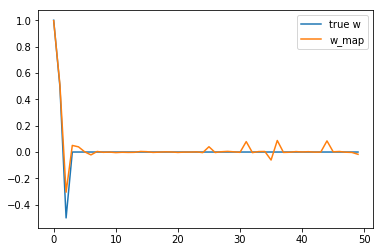

In [11]:
# perform gradient descent to find w
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
learning_rate = 0.001
l1 = 3.0 # try different values - what effect does it have on w?
for t in range(5000):
  # update w
  Yhat = sigmoid(X.dot(w))
  delta = Yhat - Y
  w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))

  # find and store the cost
  cost = -(Y*np.log(Yhat) + (1-Y)*np.log(1 - Yhat)).mean() + l1*np.abs(w).mean()
  costs.append(cost)

# plot the costs
plt.plot(costs)
plt.show()

print("final w:", w)

# plot our w vs true w
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()

In [ ]:
### Logistics Regress

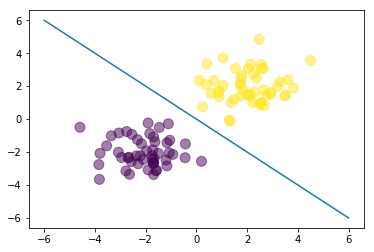

In [12]:

N = 100
D = 2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# add a column of ones
# ones = np.array([[1]*N]).T
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# get the closed-form solution
w = np.array([0, 4, 4])

# calculate the model output
z = Xb.dot(w)
Y = sigmoid(z)

plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)

x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)
plt.show()